In [1]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.densenet import preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt

In [2]:

# DenseNet121 모델 로드 (ImageNet 데이터셋에 대해 사전 학습된 가중치 사용)
model = DenseNet121(weights='imagenet')

33188688/33188688 [==============================] - 2s 0us/step


In [3]:
# 이미지 로드, 전처리
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

In [4]:
# 이미지 입력, 분류
def classify_image(img_path):
    img_array = load_and_preprocess_image(img_path)
    preds = model.predict(img_array)
    print('Predicted:', decode_predictions(preds, top=3)[0])
    return decode_predictions(preds, top=3)[0]

In [11]:
# 이미지 경로
img_path = 'data/_test_5.png'

In [12]:
# 이미지 분류
results = classify_image(img_path)

1/1 [==============================] - 0s 53ms/step
Predicted: [('n04482393', 'tricycle', 0.75219876), ('n04509417', 'unicycle', 0.077746026), ('n03792782', 'mountain_bike', 0.05392284)]


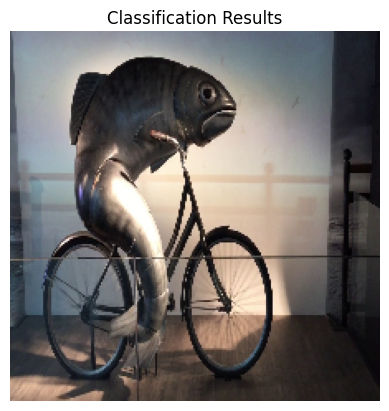

In [13]:
# 이미지, 분류 결과 시각화
img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)
plt.axis('off')
plt.title('Classification Results')
plt.show()


In [14]:

# 분류 결과 출력
for result in results:
    print(f"Class: {result[1]}, Confidence: {result[2]:.4f}")


Class: tricycle, Confidence: 0.7522
Class: unicycle, Confidence: 0.0777
Class: mountain_bike, Confidence: 0.0539
